## 데이터셋

https://www.data.go.kr/data/15061057/fileData.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 적재

In [2]:
df = pd.read_csv("주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv", encoding="cp949")

* 데이터 형상

In [3]:
df.shape

(5780, 5)

* 데이터 미리보기

In [4]:
df.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
5775,제주,모든면적,2021,5,7510
5776,제주,전용면적 60㎡이하,2021,5,NaN
5777,제주,전용면적 60㎡초과 85㎡이하,2021,5,7497
5778,제주,전용면적 85㎡초과 102㎡이하,2021,5,NaN
5779,제주,전용면적 102㎡초과,2021,5,7727


* 데이터 요약하기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5331 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


* 결측치 확인

In [7]:
df.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5775,False,False,False,False,False
5776,False,False,False,False,True
5777,False,False,False,False,False
5778,False,False,False,False,True


In [8]:
df.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

* 분양각격 data type

In [10]:
df["분양가격(㎡)"].head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [11]:
df["분양가격(㎡)"].astype(int)

ValueError: invalid literal for int() with base 10: '  '

In [16]:
df["분양가격(㎡)"] == '  '

0       False
1       False
2       False
3       False
4       False
        ...  
5775    False
5776    False
5777    False
5778    False
5779    False
Name: 분양가격(㎡), Length: 5780, dtype: bool

In [15]:
df[df["분양가격(㎡)"] == '  ']

,지역명,규모구분,연도,월,분양가격(㎡)
28,광주,전용면적 85㎡초과 102㎡이하,2015,10,
29,광주,전용면적 102㎡초과,2015,10,
34,대전,전용면적 102㎡초과,2015,10,
81,제주,전용면적 60㎡이하,2015,10,
113,광주,전용면적 85㎡초과 102㎡이하,2015,11,
114,광주,전용면적 102㎡초과,2015,11,
119,대전,전용면적 102㎡초과,2015,11,
166,제주,전용면적 60㎡이하,2015,11,
198,광주,전용면적 85㎡초과 102㎡이하,2015,12,
199,광주,전용면적 102㎡초과,2015,12,


In [17]:
df["분양가격(㎡)"] = df["분양가격(㎡)"].replace('  ', np.nan) 

In [18]:
df[df["분양가격(㎡)"] == '  ']

,지역명,규모구분,연도,월,분양가격(㎡)


In [19]:
df["분양가격(㎡)"].astype(int)

ValueError: cannot convert float NaN to integer

In [21]:
type(np.nan)

float

In [22]:
df["분양가격(㎡)"].astype(float)

ValueError: could not convert string to float: '6,657'

In [24]:
df["분양가격(㎡)"].str.contains(',')

0       False
1       False
2       False
3       False
4       False
        ...  
5775    False
5776      NaN
5777    False
5778      NaN
5779    False
Name: 분양가격(㎡), Length: 5780, dtype: object

In [25]:
df["분양가격(㎡)"].str.contains(',').sum()

76

In [28]:
df[df["분양가격(㎡)"].str.contains(',') == True]

,지역명,규모구분,연도,월,분양가격(㎡)
2125,서울,모든면적,2017,11,"6,657"
2126,서울,전용면적 60㎡이하,2017,11,"6,931"
2127,서울,전용면적 60㎡초과 85㎡이하,2017,11,"5,899"
2128,서울,전용면적 85㎡초과 102㎡이하,2017,11,"7,311"
2129,서울,전용면적 102㎡초과,2017,11,"6,880"
...,...,...,...,...,...
2203,경남,전용면적 85㎡초과 102㎡이하,2017,11,"2,914"
2204,경남,전용면적 102㎡초과,2017,11,"2,838"
2205,제주,모든면적,2017,11,"3,560"
2206,제주,전용면적 60㎡이하,2017,11,"5,380"


In [29]:
df["분양가격(㎡)"] = df["분양가격(㎡)"].str.replace(',', '')

In [30]:
df[df["분양가격(㎡)"].str.contains(',') == True]

,지역명,규모구분,연도,월,분양가격(㎡)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5315 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


In [33]:
df["분양가격(㎡)"] = df["분양가격(㎡)"].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5315 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 225.9+ KB


In [35]:
df["분양가격(㎡)"].max()

13835.0

In [36]:
df["분양가격(㎡)"].min()

1868.0

* 분양가격 요약정보

In [37]:
df["분양가격(㎡)"].describe()

count     5315.000000
mean      3420.317027
std       1391.492734
min       1868.000000
25%       2547.000000
50%       3045.000000
75%       3872.500000
max      13835.000000
Name: 분양가격(㎡), dtype: float64

In [38]:
df.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0


In [39]:
df.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
5775,제주,모든면적,2021,5,7510.0
5776,제주,전용면적 60㎡이하,2021,5,NaN
5777,제주,전용면적 60㎡초과 85㎡이하,2021,5,7497.0
5778,제주,전용면적 85㎡초과 102㎡이하,2021,5,NaN
5779,제주,전용면적 102㎡초과,2021,5,7727.0


In [41]:
df["규모구분"].unique()

array(['모든면적', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [42]:
df["규모구분"].value_counts()

전용면적 85㎡초과 102㎡이하    1156
전용면적 60㎡이하           1156
모든면적                 1156
전용면적 102㎡초과          1156
전용면적 60㎡초과 85㎡이하     1156
Name: 규모구분, dtype: int64

In [43]:
df.groupby("지역명").mean()

,연도,월,분양가격(㎡)
지역명,,,
강원,2018.088235,6.441176,2576.746951
경기,2018.088235,6.441176,4165.891176
경남,2018.088235,6.441176,2935.441088
경북,2018.088235,6.441176,2678.669811
광주,2018.088235,6.441176,3315.045614
대구,2018.088235,6.441176,3897.111782
대전,2018.088235,6.441176,3164.450980
부산,2018.088235,6.441176,3768.705882
서울,2018.088235,6.441176,7592.514706


In [44]:
df.groupby("지역명")["분양가격(㎡)"].mean()

지역명
강원    2576.746951
경기    4165.891176
경남    2935.441088
경북    2678.669811
광주    3315.045614
대구    3897.111782
대전    3164.450980
부산    3768.705882
서울    7592.514706
세종    3072.119298
울산    3331.279817
인천    3871.714286
전남    2446.883234
전북    2402.038576
제주    3714.593525
충남    2567.788162
충북    2376.174556
Name: 분양가격(㎡), dtype: float64

In [45]:
df.groupby("지역명")["분양가격(㎡)"].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,328.0,2576.746951,499.818524,2012.0,2221.00,2401.0,2830.00,4273.0
경기,340.0,4165.891176,591.738255,3079.0,3628.75,4217.5,4493.50,5745.0
경남,331.0,2935.441088,532.955884,2200.0,2651.00,2872.0,3067.00,5020.0
경북,318.0,2678.669811,404.728177,2106.0,2390.00,2612.5,2867.00,4076.0
광주,285.0,3315.045614,649.375937,2251.0,2778.00,3207.0,3836.00,4881.0
대구,331.0,3897.111782,702.152662,2503.0,3216.00,3956.0,4543.00,5158.0
대전,255.0,3164.450980,627.022784,2425.0,2660.00,3061.0,3478.50,4877.0
부산,340.0,3768.705882,428.433383,2930.0,3456.50,3843.0,4051.75,4623.0
서울,340.0,7592.514706,1445.315679,5061.0,6561.50,7247.0,8224.75,13835.0


In [47]:
#df.groupby("지역명")[["분양가격(㎡)"]].mean()
pd.pivot_table(df, index="지역명", values="분양가격(㎡)" )

,분양가격(㎡)
지역명,
강원,2576.746951
경기,4165.891176
경남,2935.441088
경북,2678.669811
광주,3315.045614
대구,3897.111782
대전,3164.450980
부산,3768.705882
서울,7592.514706


In [51]:
plt.rc("font", family="Malgun Gothic")

<AxesSubplot:xlabel='지역명'>

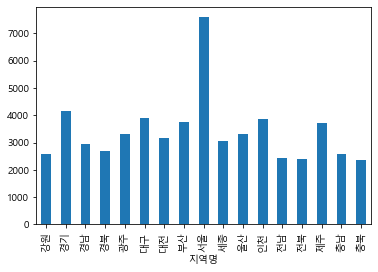

In [52]:
g = df.groupby("지역명")["분양가격(㎡)"].mean()
g.plot(kind="bar")

<AxesSubplot:xlabel='지역명'>

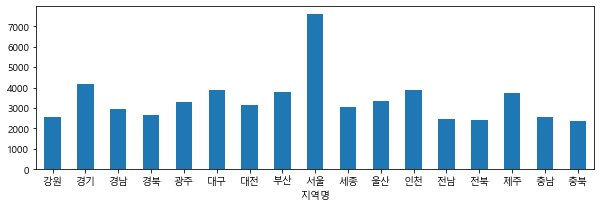

In [54]:
g.plot(kind="bar", rot=0, figsize=(10, 3))

In [55]:
df.groupby(["지역명", "규모구분"]).mean()

연도         월      분양가격(㎡)
지역명 규모구분                                                 
강원  모든면적               2018.088235  6.441176  2418.882353
    전용면적 102㎡초과        2018.088235  6.441176  2898.573529
    전용면적 60㎡이하         2018.088235  6.441176  2484.029412
    전용면적 60㎡초과 85㎡이하   2018.088235  6.441176  2409.794118
    전용면적 85㎡초과 102㎡이하  2018.088235  6.441176  2692.964286
...                            ...       ...          ...
충북  모든면적               2018.088235  6.441176  2256.000000
    전용면적 102㎡초과        2018.088235  6.441176  2553.808824
    전용면적 60㎡이하         2018.088235  6.441176  2232.941176
    전용면적 60㎡초과 85㎡이하   2018.088235  6.441176  2270.279412
    전용면적 85㎡초과 102㎡이하  2018.088235  6.441176  2573.651515

[85 rows x 3 columns]

In [56]:
df.groupby(["지역명", "규모구분"])["분양가격(㎡)"].mean()

지역명  규모구분             
강원   모든면적                 2418.882353
     전용면적 102㎡초과          2898.573529
     전용면적 60㎡이하           2484.029412
     전용면적 60㎡초과 85㎡이하     2409.794118
     전용면적 85㎡초과 102㎡이하    2692.964286
                             ...     
충북   모든면적                 2256.000000
     전용면적 102㎡초과          2553.808824
     전용면적 60㎡이하           2232.941176
     전용면적 60㎡초과 85㎡이하     2270.279412
     전용면적 85㎡초과 102㎡이하    2573.651515
Name: 분양가격(㎡), Length: 85, dtype: float64

In [57]:
df.groupby(["지역명", "규모구분"])["분양가격(㎡)"].mean().unstack()

규모구분,모든면적,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하
지역명,,,,,
강원,2418.882353,2898.573529,2484.029412,2409.794118,2692.964286
경기,3939.308824,4580.338235,4087.073529,3927.911765,4294.823529
경남,2738.764706,3130.590164,2709.712121,2727.676471,3383.911765
경북,2571.720588,2896.830769,2565.573529,2566.441176,2850.387755
광주,3223.544118,3687.872727,3106.714286,3208.647059,3511.064516
대구,3830.602941,4203.750000,3851.279412,3832.602941,3747.525424
대전,3068.647059,4507.600000,2922.596774,3052.455882,2750.777778
부산,3742.235294,4021.573529,3597.705882,3726.426471,3755.588235
서울,7205.352941,7609.132353,7393.647059,7174.750000,8579.691176


In [58]:
df.groupby(["연도", "지역명"])["분양가격(㎡)"].mean()

연도    지역명
2015  강원     2178.200000
      경기     3351.800000
      경남     2563.400000
      경북     2261.866667
      광주     2399.000000
                ...     
2021  전남     2981.560000
      전북     2571.240000
      제주     6264.352941
      충남     2887.217391
      충북     2668.720000
Name: 분양가격(㎡), Length: 119, dtype: float64

In [59]:
df.groupby(["연도", "지역명"])["분양가격(㎡)"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,2178.200000,3351.800000,2563.400000,2261.866667,2399.000000,2733.000000,2482.000000,3144.666667,6156.266667,2656.066667,2838.666667,3326.066667,2060.266667,2154.666667,2409.416667,2330.266667,2069.333333
2016,2170.576923,3540.900000,2574.766667,2349.516667,2785.055556,3115.766667,2700.222222,3255.616667,6591.950000,2684.183333,2903.810345,3363.350000,2102.000000,2092.916667,2899.236364,2411.583333,2161.616667
2017,2217.833333,3726.116667,2668.666667,2511.534483,2909.000000,3694.537037,3003.912281,3526.550000,6625.483333,2767.559322,3221.260870,3537.100000,2246.433333,2244.280702,3826.830189,2471.913793,2261.383333
2018,2490.683333,4320.733333,2826.566667,2630.538462,2886.955556,3678.561404,3101.244444,3906.050000,7030.983333,3133.473684,3103.454545,3600.464286,2402.983333,2477.150000,3616.960000,2485.400000,2469.483333
2019,2707.416667,4747.133333,3241.701754,2742.500000,3670.204545,4267.166667,3824.000000,4102.383333,8571.766667,3424.058824,3095.833333,4015.083333,2490.689655,2585.533333,3584.384615,2651.163636,2415.416667
2020,3121.946429,4577.600000,3308.870370,3029.604167,4062.571429,4640.666667,3405.710526,4046.366667,9024.550000,3523.666667,3890.181818,4540.300000,2897.696429,2593.766667,4300.871795,2769.509091,2533.017241
2021,3193.800000,4455.080000,3420.960000,3379.600000,4155.041667,4734.000000,3400.866667,4158.880000,8737.080000,3788.600000,4306.952381,4881.160000,2981.560000,2571.240000,6264.352941,2887.217391,2668.720000


In [60]:
df.groupby(["연도", "지역명"])["분양가격(㎡)"].mean()

연도    지역명
2015  강원     2178.200000
      경기     3351.800000
      경남     2563.400000
      경북     2261.866667
      광주     2399.000000
                ...     
2021  전남     2981.560000
      전북     2571.240000
      제주     6264.352941
      충남     2887.217391
      충북     2668.720000
Name: 분양가격(㎡), Length: 119, dtype: float64

In [61]:
pd.pivot_table(df, index=["연도", "지역명"], values=["분양가격(㎡)"])

분양가격(㎡)
연도   지역명             
2015 강원   2178.200000
     경기   3351.800000
     경남   2563.400000
     경북   2261.866667
     광주   2399.000000
...               ...
2021 전남   2981.560000
     전북   2571.240000
     제주   6264.352941
     충남   2887.217391
     충북   2668.720000

[119 rows x 1 columns]

In [62]:
pd.pivot_table(df, index=["연도", "지역명"], values=["분양가격(㎡)"]).loc[2021]

,분양가격(㎡)
지역명,
강원,3193.800000
경기,4455.080000
경남,3420.960000
경북,3379.600000
광주,4155.041667
대구,4734.000000
대전,3400.866667
부산,4158.880000
서울,8737.080000


* seaborn

<AxesSubplot:xlabel='지역명'>

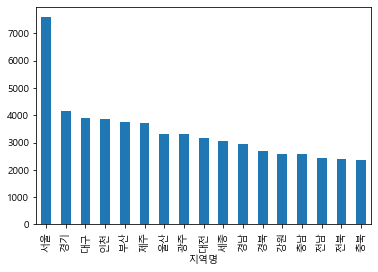

In [64]:
g = df.groupby("지역명")["분양가격(㎡)"].mean().sort_values(ascending=False)
g.plot(kind="bar")

<AxesSubplot:xlabel='지역명', ylabel='분양가격(㎡)'>

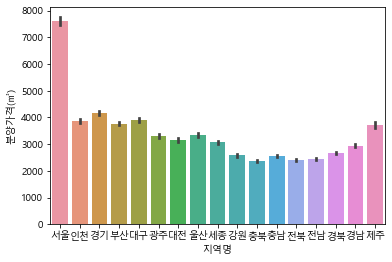

In [67]:
sns.barplot(data=df, x="지역명", y="분양가격(㎡)")

<AxesSubplot:xlabel='연도', ylabel='분양가격(㎡)'>

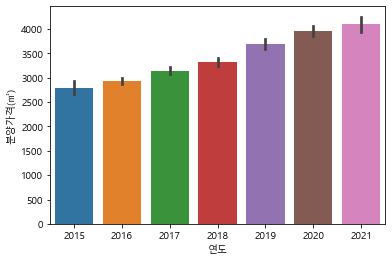

In [68]:
sns.barplot(data=df, x="연도", y="분양가격(㎡)")

<AxesSubplot:xlabel='연도', ylabel='분양가격(㎡)'>

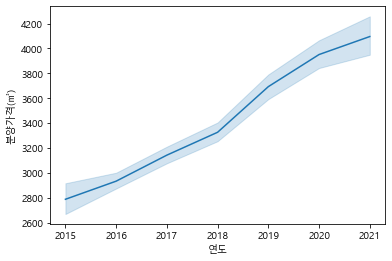

In [69]:
sns.lineplot(data=df, x="연도", y="분양가격(㎡)")

<AxesSubplot:xlabel='연도', ylabel='분양가격(㎡)'>

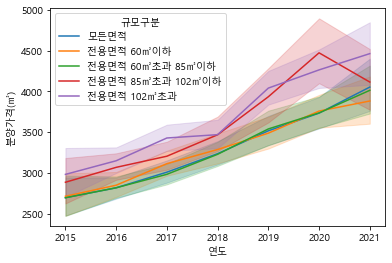

In [70]:
sns.lineplot(data=df, x="연도", y="분양가격(㎡)", hue="규모구분")

* barplot vs boxplot vs violionplot

<AxesSubplot:xlabel='연도', ylabel='분양가격(㎡)'>

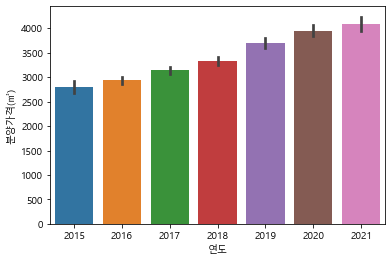

In [71]:
sns.barplot(data=df, x="연도", y="분양가격(㎡)")

<AxesSubplot:xlabel='연도', ylabel='분양가격(㎡)'>

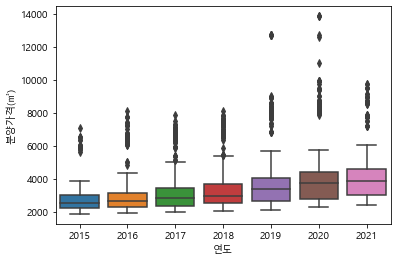

In [73]:
sns.boxplot(data=df, x="연도", y="분양가격(㎡)")

In [74]:
df["분양가격(㎡)"].describe()

count     5315.000000
mean      3420.317027
std       1391.492734
min       1868.000000
25%       2547.000000
50%       3045.000000
75%       3872.500000
max      13835.000000
Name: 분양가격(㎡), dtype: float64

In [76]:
max_price = df["분양가격(㎡)"].max()
max_price

13835.0

In [78]:
df[df["분양가격(㎡)"] == max_price]

,지역명,규모구분,연도,월,분양가격(㎡)
4423,서울,전용면적 85㎡초과 102㎡이하,2020,2,13835.0
4508,서울,전용면적 85㎡초과 102㎡이하,2020,3,13835.0
4593,서울,전용면적 85㎡초과 102㎡이하,2020,4,13835.0


<AxesSubplot:xlabel='연도', ylabel='분양가격(㎡)'>

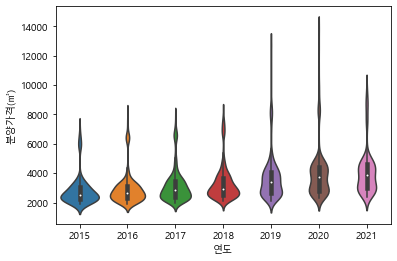

In [79]:
sns.violinplot(data=df, x="연도", y="분양가격(㎡)")

<AxesSubplot:>

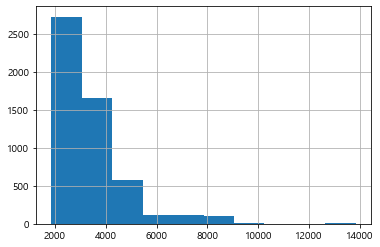

In [80]:
df["분양가격(㎡)"].hist()

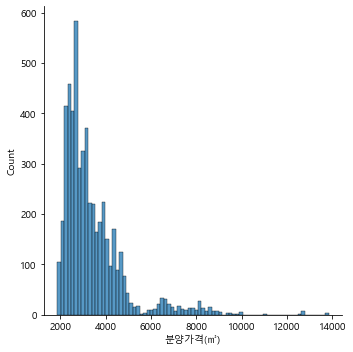

In [81]:
sns.displot(df["분양가격(㎡)"])

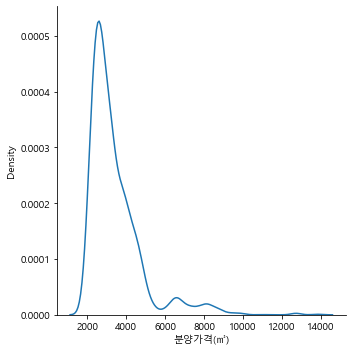

In [82]:
sns.displot(df["분양가격(㎡)"], kind="kde")

In [83]:
df.groupby(["연도", "지역명"])["분양가격(㎡)"].mean()

연도    지역명
2015  강원     2178.200000
      경기     3351.800000
      경남     2563.400000
      경북     2261.866667
      광주     2399.000000
                ...     
2021  전남     2981.560000
      전북     2571.240000
      제주     6264.352941
      충남     2887.217391
      충북     2668.720000
Name: 분양가격(㎡), Length: 119, dtype: float64

In [84]:
df.groupby(["연도", "지역명"])["분양가격(㎡)"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,2178.200000,3351.800000,2563.400000,2261.866667,2399.000000,2733.000000,2482.000000,3144.666667,6156.266667,2656.066667,2838.666667,3326.066667,2060.266667,2154.666667,2409.416667,2330.266667,2069.333333
2016,2170.576923,3540.900000,2574.766667,2349.516667,2785.055556,3115.766667,2700.222222,3255.616667,6591.950000,2684.183333,2903.810345,3363.350000,2102.000000,2092.916667,2899.236364,2411.583333,2161.616667
2017,2217.833333,3726.116667,2668.666667,2511.534483,2909.000000,3694.537037,3003.912281,3526.550000,6625.483333,2767.559322,3221.260870,3537.100000,2246.433333,2244.280702,3826.830189,2471.913793,2261.383333
2018,2490.683333,4320.733333,2826.566667,2630.538462,2886.955556,3678.561404,3101.244444,3906.050000,7030.983333,3133.473684,3103.454545,3600.464286,2402.983333,2477.150000,3616.960000,2485.400000,2469.483333
2019,2707.416667,4747.133333,3241.701754,2742.500000,3670.204545,4267.166667,3824.000000,4102.383333,8571.766667,3424.058824,3095.833333,4015.083333,2490.689655,2585.533333,3584.384615,2651.163636,2415.416667
2020,3121.946429,4577.600000,3308.870370,3029.604167,4062.571429,4640.666667,3405.710526,4046.366667,9024.550000,3523.666667,3890.181818,4540.300000,2897.696429,2593.766667,4300.871795,2769.509091,2533.017241
2021,3193.800000,4455.080000,3420.960000,3379.600000,4155.041667,4734.000000,3400.866667,4158.880000,8737.080000,3788.600000,4306.952381,4881.160000,2981.560000,2571.240000,6264.352941,2887.217391,2668.720000


In [87]:
h = pd.pivot_table(df, index="연도", columns="지역명", values="분양가격(㎡)")

<AxesSubplot:xlabel='지역명', ylabel='연도'>

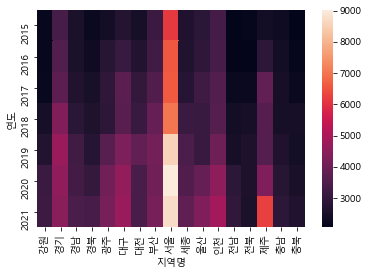

In [88]:
sns.heatmap(h)

<AxesSubplot:xlabel='지역명', ylabel='연도'>

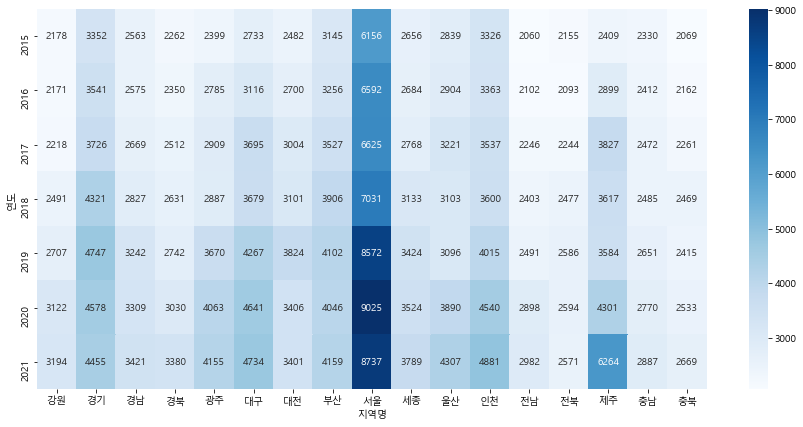

In [90]:
plt.figure(figsize=(15, 7))
sns.heatmap(h, cmap="Blues", annot=True, fmt=".0f")

In [91]:
h.T

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,2178.200000,2170.576923,2217.833333,2490.683333,2707.416667,3121.946429,3193.800000
경기,3351.800000,3540.900000,3726.116667,4320.733333,4747.133333,4577.600000,4455.080000
경남,2563.400000,2574.766667,2668.666667,2826.566667,3241.701754,3308.870370,3420.960000
경북,2261.866667,2349.516667,2511.534483,2630.538462,2742.500000,3029.604167,3379.600000
광주,2399.000000,2785.055556,2909.000000,2886.955556,3670.204545,4062.571429,4155.041667
대구,2733.000000,3115.766667,3694.537037,3678.561404,4267.166667,4640.666667,4734.000000
대전,2482.000000,2700.222222,3003.912281,3101.244444,3824.000000,3405.710526,3400.866667
부산,3144.666667,3255.616667,3526.550000,3906.050000,4102.383333,4046.366667,4158.880000
서울,6156.266667,6591.950000,6625.483333,7030.983333,8571.766667,9024.550000,8737.080000


<AxesSubplot:xlabel='연도', ylabel='지역명'>

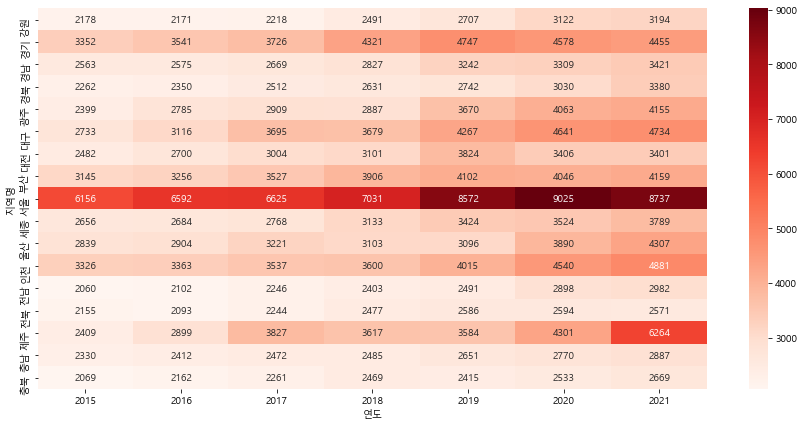

In [92]:
plt.figure(figsize=(15, 7))
sns.heatmap(h.T, cmap="Reds", annot=True, fmt=".0f")